### Next Word Prediction

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

### Reading Data

In [2]:
filename = "data.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:100])


project gutenberg's the adventures of sherlock holmes, by arthur conan doyle

this ebook is for the


### Data preprocessing

In [3]:
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [4]:
chars = sorted(list(set(raw_text)))

In [5]:
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [6]:
int_to_char = dict((i, c) for i, c in enumerate(chars))


In [7]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)


Total Characters in the text; corpus length:  581395
Total Vocab:  62


In [8]:
seq_length = 60 
step = 10   
sentences = [] 
next_chars = [] 
for i in range(0, n_chars - seq_length, step):
    sentences.append(raw_text[i: i + seq_length])
    next_chars.append(raw_text[i + seq_length])
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)



Number of sequences: 58134


In [9]:
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    

In [11]:
print(x.shape)
print(y.shape)

(58134, 60, 62)
(58134, 62)


### Building model

In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))


In [13]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               97792     
_________________________________________________________________
dense (Dense)                (None, 62)                7998      
Total params: 105,790
Trainable params: 105,790
Non-trainable params: 0
_________________________________________________________________


C:\Users\ramch\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
history = model.fit(x, y,batch_size=128,epochs=5)

Epoch 1/5
455/455 [==============================] - 12s 26ms/step - loss: 1.4929
Epoch 2/5
455/455 [==============================] - 11s 24ms/step - loss: 1.4315
Epoch 3/5
455/455 [==============================] - 11s 24ms/step - loss: 1.3797
Epoch 4/5
455/455 [==============================] - 11s 24ms/step - loss: 1.3342
Epoch 5/5
455/455 [==============================] - 11s 24ms/step - loss: 1.3155


### visualization

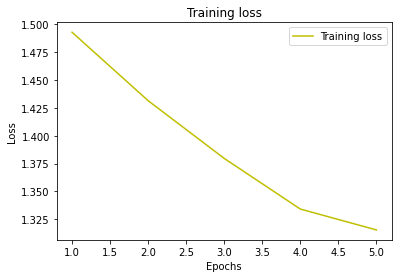

In [16]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [18]:
start_index = random.randint(0, n_chars - seq_length - 1)


In [19]:
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

### predicting next word

In [20]:
for i in range(400):
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

anviss, there is is know look your, and so aw seen neck-glacks promather. i was all to the light had belach to the eashwancading.”

“imays hardly it come soc to have been very possibl, watson, that they solver,
i letter
alichad of a scumpared the antirarication of your count as has been was borallic that some commote from
it. hohare outended the
rearaid. he asked to proluen, three, and little had 
